In [16]:
import os
import gzip
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, KMeans

data_folder = 'data'

In [3]:
files_to_parse = list(map(lambda file: os.path.join(data_folder, file), filter(lambda f: 'ipynb' not in f, os.listdir(data_folder))))

In [4]:
corpus = []
for i, file in tqdm(enumerate(files_to_parse), total=len(files_to_parse)):
    data = []
    with gzip.open(file,'r') as fin:        
        data = fin.readlines()
    for d in data:
        try:
            d = d.decode("utf-8").strip()
        except UnicodeDecodeError:
            continue
        parsed_d = d.replace('.', '')
        is_digit = parsed_d.isdigit()
        num_raw_tokens = len(parsed_d.split())
        booleans = (num_raw_tokens >= 20, not is_digit)
        if all(booleans):
            corpus.append(d)
    if i > 10:
        break

  1%|          | 11/1247 [00:01<02:20,  8.79it/s]


In [5]:
subset = corpus[:20_000]

In [6]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2').cuda()

Exception when trying to download https://sbert.net/models/sentence-transformers/all-MiniLM-L6-v2.zip. Response 404


In [7]:
sentence_embeddings = model.encode(subset, show_progress_bar=True)

Batches:   0%|          | 0/549 [00:00<?, ?it/s]

In [8]:
tsne = TSNE(random_state=17, n_jobs=32)
tsne_data = tsne.fit_transform(sentence_embeddings)

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


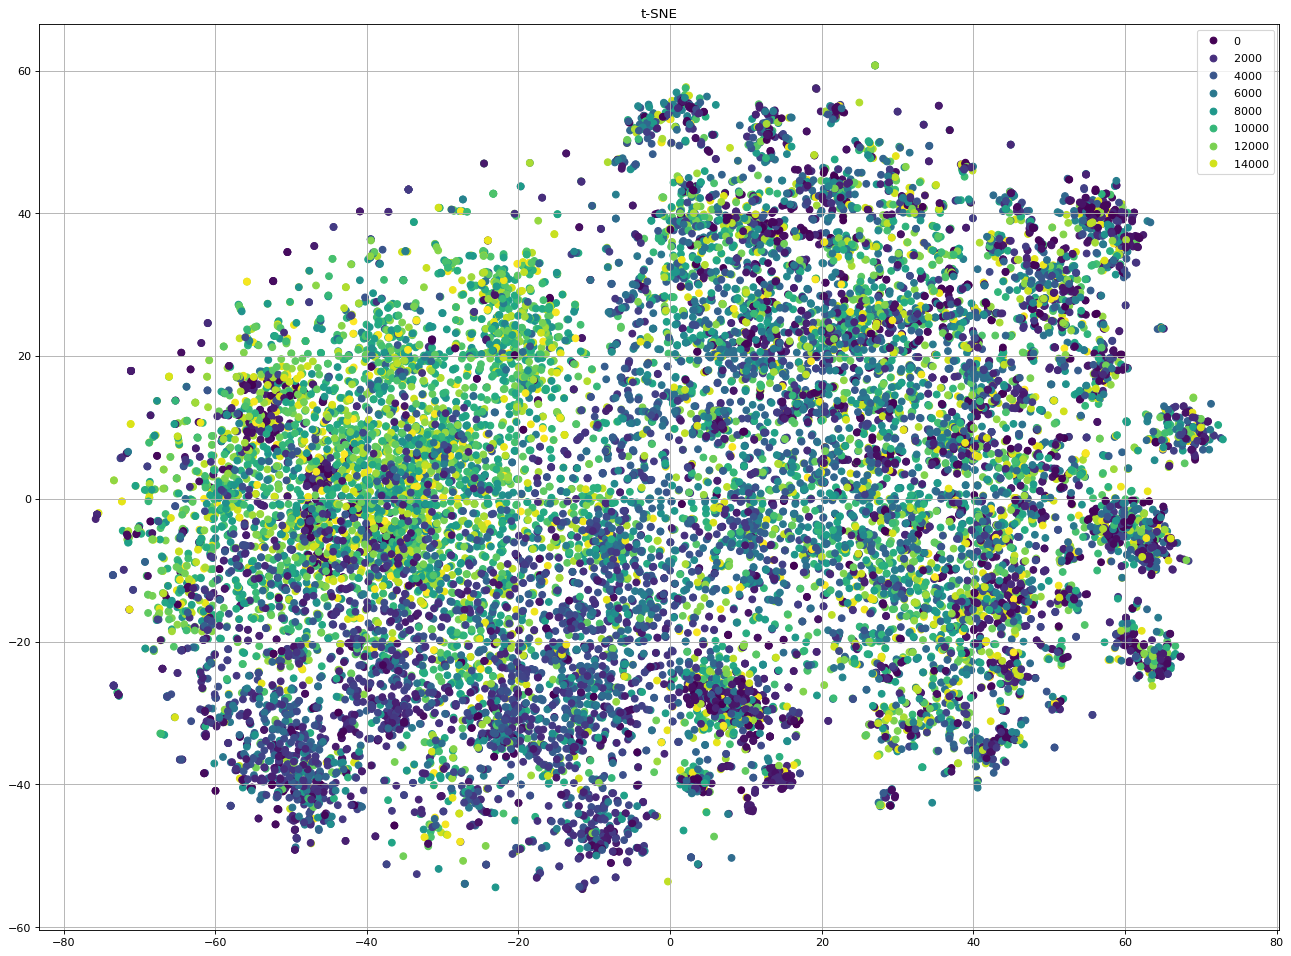

In [21]:
spec = AgglomerativeClustering(n_clusters=None,
                               affinity='cosine',
                               linkage='complete',
                               distance_threshold=0.3)

labels = spec.fit_predict(sentence_embeddings)

plt.figure(figsize=(20, 15), dpi=80)
plt.title("t-SNE")
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.grid(True)
plt.legend(*scatter.legend_elements())
plt.show()

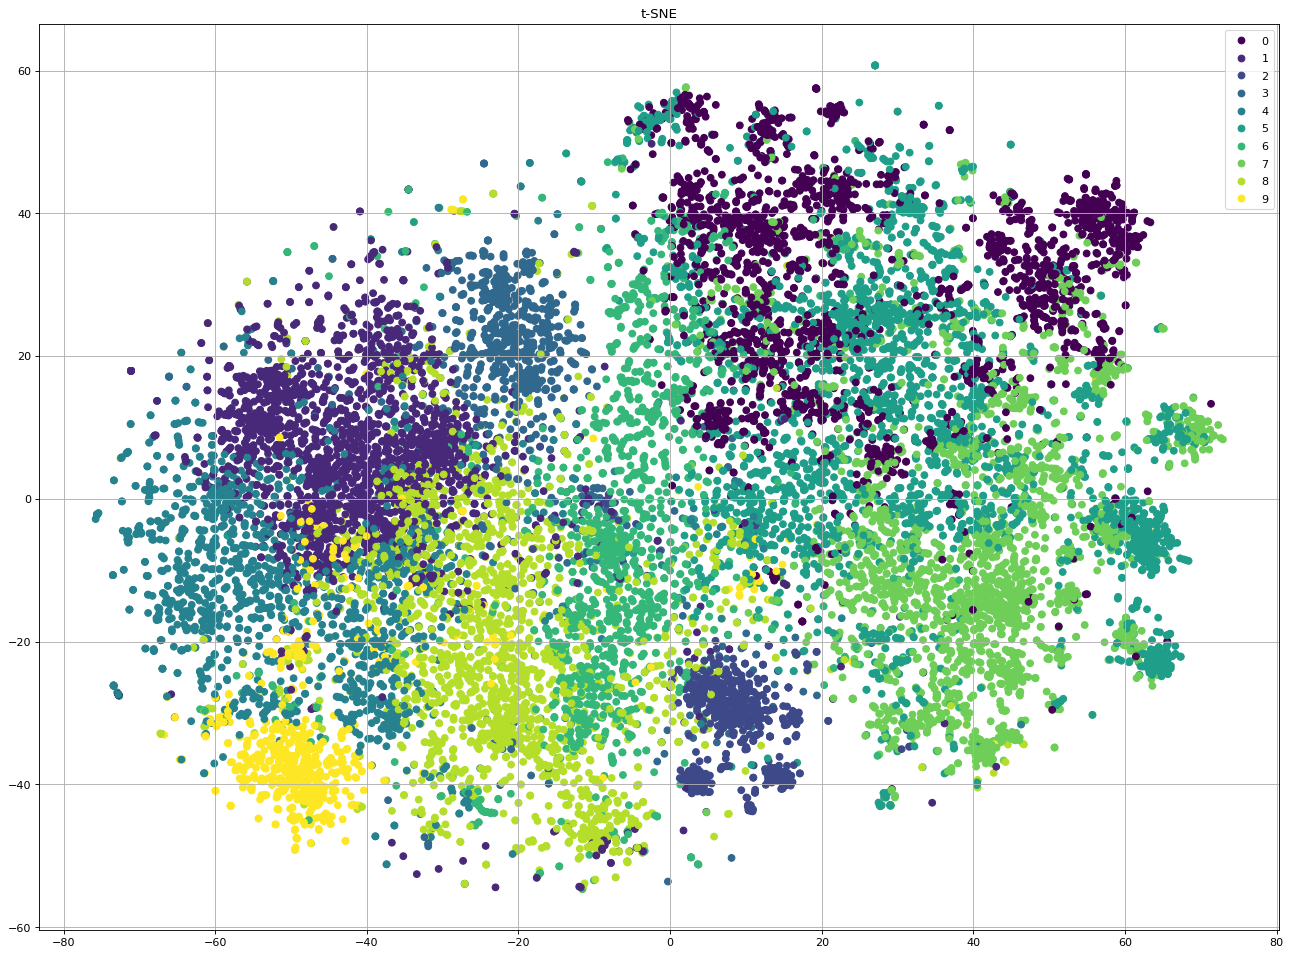

In [23]:
spec = KMeans(n_clusters=10)

labels = spec.fit_predict(sentence_embeddings)

plt.figure(figsize=(20, 15), dpi=80)
plt.title("t-SNE")
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.grid(True)
plt.legend(*scatter.legend_elements())
plt.show()